# Inspección por muestreo

## 06-01 Inspección por muestreo

La inspección por muestreo es el proceso mediante el cual se toma una muestra de un lote objetivo siguiendo un método de inspección por muestreo previamente establecido. Luego, se realizan pruebas o mediciones en la muestra y se comparan con los criterios de aceptación o rechazo del lote, para determinar si dicho lote es aceptado o rechazado.

### 1. ¿Qué es la inspección por muestreo?

1. Clasificación según los datos manejados
* Inspección por muestreo de datos por conteo
* Inspección por muestreo de datos por medición
2. Clasificación según el número de muestreos
3. Clasificación según el método para determinar los criterios de aceptación o rechazo

### 2. Tipos de métodos de inspección por muestreo

### 3. Diseño previo de la inspección por muestreo
* Curva probabilidad acumlada (Culva Thorndike-Haga)
### Curva característica operativa (OC)

In [1]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Figura 6.3 Ejemplo de la curva OC

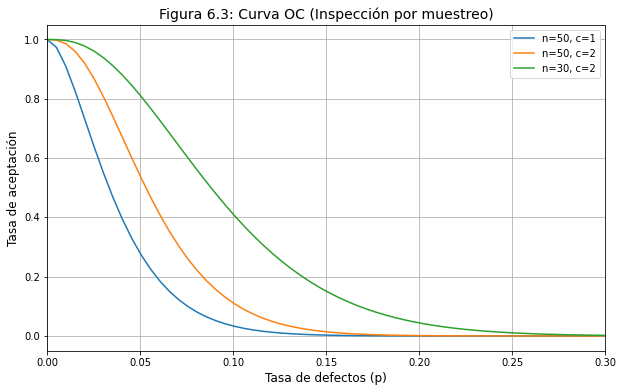

In [3]:
from scipy.stats import binom

# n: Tamaño de la muestra, c: Número de unidades aceptables
n_values = [50, 50, 30]
c_values = [1, 2, 2]

# Rango de tasa de defectos (p)
p = np.linspace(0, 0.5, 100)

# Dibujo de la curva OC
plt.figure(figsize=(10, 6))

for n, c in zip(n_values, c_values):
    # Cálculo de la tasa de aceptación (probabilidad acumulada) en función de la tasa de defectos
    oc_curve = binom.cdf(c, n, p)
    plt.plot(p, oc_curve, label=f'n={n}, c={c}')

# Configuración del gráfico
plt.title('Figura 6.3: Curva OC (Inspección por muestreo)', fontsize=14)
plt.xlabel('Tasa de defectos (p)', fontsize=12)
plt.ylabel('Tasa de aceptación', fontsize=12)
plt.xlim(0,0.3)
plt.grid(True)
plt.legend()
plt.show()


## 06-02 Inspección por muestreo de tipo de conteo

La inspección por muestreo de tipo de conteo acepta el lote aprobado tal como está, pero en el caso del lote no aprobado, se realiza una selección total para reparar los productos defectuosos o reemplazarlos por productos conformes, asegurando que todo el lote sea conforme.

* AOQ: Average Outgoing Quality
* LTPD: Lot Tolerance Percent Defective
* AOQL: Average Outgoing Quality Limit
* Curva de Calidad Promedio de Aceptación
* AOQL: Límite de Calidad Promedio de Salida

## 06-03 Inspección por muestreo tipo ajustado

### Inspección por muestreo tipo ajustado

La inspección por muestreo tipo ajustado se caracteriza por disponer de tres tipos de tablas de muestreo: normal, estricta y relajada, y cambiar el nivel de aplicación según el estado de los resultados de la inspección.

### Inspección por muestreo según JIS Z 9015-1:2006

Una normativa que regula el método de inspección por muestreo basado en el índice AQL (Nivel de Calidad Aceptable) para la inspección por lotes.

#### Características de JIS Z 9015-1:2006

#### Procedimiento de inspección
1. Establecer los criterios de evaluación de calidad para clasificar productos conformes y no conformes.
2. Determinar el AQL (Nivel de Calidad Aceptable)
3. Establecer el nivel de inspección
4. Determinar el tipo de muestreo
5. Determinar el grado de rigor de la inspección.
6. Tomar los lotes.
7. Determinar el método de muestreo.
8. Realizar la inspección de muestreo sobre las muestras.
9. Gestionar los lotes aprobados y rechazados.
10. Procesar los lotes.
11. Registrar los resultados de la inspección incluyendo los elementos necesarios para ajustar el rigor de la inspección.

## 6.1

JIS Z 9015-1を用いて、ゆるい検査。ロットの大きさN=1000，通常検査水準III、AQL=1.5%で抜き取り検査を実施する。以下の設問に答えよ。
1. 表（JIS Z 9015-1:2006）を用いて、サンプル（サイズ）文字を求めよ。
2. 一回抜き取り方式で行うときのサンプルサイズと合格判定個数、不合格判定個数を求めよ。
3. このとき、ロットの不適合品率に対するロットの合格する確率をグラフにする（QC曲線）と図6.4のようになった。AQL=1.5%の品質のロットが不合格になる確率（生産者危険）と消費者10%に対するロットの不適合品率を求めよ。


Usando la norma JIS Z 9015-1, realizar una inspección por muestreo y responde las siguientes preguntas:
1. Utilizado la tabla (JIS Z 9015-1:2006), determina la letra de código para el tamaño de la muestra.
2. En el caso de realizar una inspección por muestreo simple, calcula el tamaño de la muestra, el número de aceptación y el número de rechazo.
3. Gráfica la probabilidad de aceptación del lote en función de la tasa de productos no conformes en el lote (curva QC), de manera que coincida con la Figura 6.4. Calcula también la probabilidad de que un lote con calidad AQC = 1.5% sea rechazado (riesgo del productor) y determina la tasa de productos no conformes en el lote correspondiente al 10% de probabilidad de aceptación (riesgo del consumidor).



Sample Code Letter: K
Sample Size: 50, Acceptance Number: 3, Rejection Number: 4


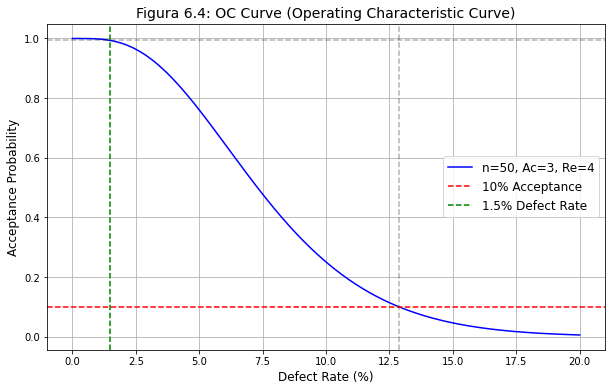

La probabilidad de aceptación cuando la tasa de no conformidad del lote es del 1.5%: 0.9933
Tasa de riesgo del productor（la probabilidad de rechazo cuando la tasa de no conformidad es del 1%）: 0.0001
La tasa de no conformidad del lote cuando la probabilidad de aceptación es del 10%: 12.88%


In [4]:
from scipy.optimize import brentq

def get_sample_code_letter(lot_size, inspection_level):
    # Obtener el carácter de código de muestra basado en la tabla
    inspection_levels = {
        'I': [2, 8, 15, 25, 50, 90, 150, 280, 500, 1200, 3200, 10000, 35000, 150000, 500000],
        'II': [2, 8, 20, 32, 50, 125, 200, 315, 500, 1250, 3200, 10000, 35000, 150000, 500000],
        'III': [2, 8, 20, 32, 80, 125, 315, 500, 800, 2000, 3200, 10000, 35000, 150000, 500000]
    }

    lot_ranges = [2, 8, 15, 25, 50, 90, 150, 280, 500, 1200, 3200, 10000, 35000, 150000, 500000]
    code_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q']

    for i, size in enumerate(lot_ranges):
        if lot_size <= size:
            return code_letters[i]
    return code_letters[-1]

def get_sampling_plan(code_letter, aql):
    # Obtener el tamaño de la muestra y los criterios de aceptación basados en la tabla
    sampling_table = {
        'A': (2, 0, 1),
        'B': (2, 0, 1),
        'C': (2, 0, 1),
        'D': (3, 0, 1),
        'E': (5, 0, 1),
        'F': (8, 1, 2),
        'G': (13, 1, 2),
        'H': (20, 1, 2),
        'J': (32, 2, 3),
        'K': (50, 3, 4),
        'L': (80, 4, 5),
        'M': (125, 6, 7),
        'N': (200, 8, 9),
        'P': (315, 10, 11),
        'Q': (500, 10, 11)
    }
    return sampling_table[code_letter]


# main
lot_size = 1000
inspection_level = 'III'
aql = 0.015

# Obtener el carácter de código
code_letter = get_sample_code_letter(lot_size, inspection_level)
print(f"Sample Code Letter: {code_letter}")

# Obtener el tamaño de la muestra y los criterios de aceptación
n, ac, re = get_sampling_plan(code_letter, aql)
print(f"Sample Size: {n}, Acceptance Number: {ac}, Rejection Number: {re}")

# Establecer el rango de la tasa de defectos
p_values = np.linspace(0, 0.2, 1000)

# Calcular la curva de OC
oc_values = [sum(binom.pmf(k, n, p) for k in range(ac + 1)) for p in p_values]

# Dibujo el gráfico
plt.figure(figsize=(10, 6))
ymin, ymax = plt.ylim()

plt.plot(p_values * 100, oc_values, label=f'n={n}, Ac={ac}, Re={re}', color='blue')
plt.title("Figura 6.4: OC Curve (Operating Characteristic Curve)", fontsize=14)
plt.xlabel("Defect Rate (%)", fontsize=12)
plt.ylabel("Acceptance Probability", fontsize=12)
plt.axhline(y=0.1, color='red', linestyle='--', label='10% Acceptance')
plt.axvline(x=12.88, color='k', linestyle='--', label='',alpha=0.3)
plt.axhline(y=0.9933, color='k', linestyle='--', label='',alpha=0.3)
plt.axvline(x=1.5, color='green', linestyle='--', label='1.5% Defect Rate')
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# 1. La tasa de aceptación cuando la tasa de no conformidad del lote es del 1.5%
p_defect = 0.015  # Tasa de no conformidad 1.5%
accept_prob = sum(binom.pmf(k, n, p_defect) for k in range(ac + 1))
print(f"La probabilidad de aceptación cuando la tasa de no conformidad del lote es del 1.5%: {accept_prob:.4f}")

# 2. Tasa de riesgo del productor (la tasa de rechazo cuando la tasa de no conformidad es baja)
# La tasa de rechazo cuando la tasa de no conformidad es extremadamente baja.
producer_risk = 1 - sum(binom.pmf(k, n, 0.01) for k in range(re + 1))
print(f"Tasa de riesgo del productor（la probabilidad de rechazo cuando la tasa de no conformidad es del 1%）: {producer_risk:.4f}")

# 3. Determinar la tasa de no conformidad cuando la tasa de aceptación es del 10%
def find_defect_rate(p):
    return sum(binom.pmf(k, n, p) for k in range(ac + 1)) - 0.1

# Encontrar la raíz utilizando el método de Brent
p_accept_10 = brentq(find_defect_rate, 0.001, 0.5)
print(f"La tasa de no conformidad del lote cuando la probabilidad de aceptación es del 10%: {p_accept_10 * 100:.2f}%")



In [5]:
notebook_name = 'QCKentei1-6.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")
print(notebook_name + '  ->  ' + notebook_name_html)

!jupyter nbconvert --to html {notebook_name}
!mv {notebook_name_html} ../html/

QCKentei1-6.ipynb  ->  QCKentei1-6.html
[NbConvertApp] Converting notebook QCKentei1-6.ipynb to html
[NbConvertApp] Writing 699874 bytes to QCKentei1-6.html
mv: rename QCKentei1-6.html to ../html/: No such file or directory
